# Classification ascendante hiérarchique

## Import des bibliothèques

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

Implantez une fonction renvoyant la distance euclidienne entre deux points. Ces points devront être de même dimension. Ils pourront être implanté comme une liste, un tuple, un tableau numpy unidirectionnel ou une Series.

In [13]:
def distance1(p1,p2):
    p1=np.array(p1)
    p2=np.array(p2)
    return np.sum(np.sqrt(((p2-p1)**2)))

In [14]:
print(distance1([2,3],(4,3)))
print(distance1(pd.Series([1,2,3]),np.array([2,3,4])))

2.0
3.0


Exécutez la cellule suivante

[[ 3.69319556  8.14245583]
 [ 4.88643541  7.16184202]
 [ 7.61332421 -6.69539068]
 [ 4.52933835  6.8375356 ]
 [ 6.9160767   9.07534835]
 [ 5.25212909  6.11775271]
 [ 2.68785991  6.94473962]
 [ 6.85365398  6.77684323]
 [ 3.4690515   7.30290118]
 [ 2.47401071  8.29063319]
 [ 8.04591388 -8.19989868]
 [ 2.1461589   4.71850657]
 [ 6.91939185  8.07261556]
 [ 8.09959328 -5.76748383]
 [ 7.34679314 -6.34858501]
 [ 6.71154917  9.71403788]
 [ 7.43481888  8.98231821]
 [ 3.76954397  5.16308749]
 [ 8.28065374 -5.6379824 ]
 [ 7.29118554 -7.52850066]
 [ 7.64255671 -7.77859199]
 [ 6.2683753   8.74632798]
 [ 8.40922294 -7.193665  ]
 [ 6.17369744  9.96449888]
 [ 8.55712011  9.57691071]
 [ 6.37902026 -6.88177585]
 [ 2.39882906  7.75376883]
 [ 3.45729081  7.63598595]
 [ 8.02484385  9.46310233]
 [ 7.13740282 -4.8153769 ]
 [ 8.75003099  9.56304774]
 [ 5.5576994  -6.9004789 ]
 [ 7.54031435 -8.65870325]
 [ 3.67220153  5.92127812]
 [ 6.12754768  8.72229535]
 [ 6.16915236  9.24220899]
 [ 7.65184702  8.83085919]
 

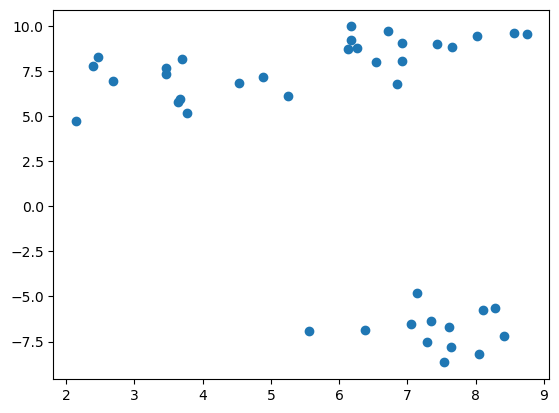

In [19]:
n_samples = 40
X, Y = make_blobs(n_samples = n_samples)
print(X)
print(Y)
X = pd.DataFrame(X, columns = ['abscisse','ordonnée'])
plt.figure()
plt.scatter(X['abscisse'],X['ordonnée'])

Etudiez l'aide de la fonction `make_blobs`. Puis faites varier les paramètres `n_spamples` et `centers` pour visualiser leur effets.

Nous allons implanter l'algorithme de classification ascendante hiérarchique petit à petit

Une partition est une répartition des points dans des groupes. Les groupes seront implantés par des listes. La partition est elle-même une liste des groupes.

Commencer par initialiser une partition (liste) dont les groupes (listes) contiendront chacun un des points de `X`. 

In [5]:
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers 

In [6]:
partition=[[i] for i in X.to_numpy()]
partition

[[array([4.84981003, 0.87633123])],
 [array([ 4.03595715, -9.19278138])],
 [array([-2.88080233, -5.60628879])],
 [array([ 4.25045616, -8.29676513])],
 [array([-3.36621435, -6.2776619 ])],
 [array([ 2.92785552, -8.44165069])],
 [array([5.88233759, 1.71618892])],
 [array([-4.47060646, -4.18072292])],
 [array([5.82716036, 1.85009003])],
 [array([ 1.87388721, -7.66540375])],
 [array([-3.96289858, -5.08192403])],
 [array([-4.99075773, -5.51148469])],
 [array([6.16224134, 1.79179322])],
 [array([-4.84125363, -5.73267407])],
 [array([4.97715518, 0.48660361])],
 [array([5.55226453, 0.53554556])],
 [array([-4.76938325, -4.74598826])],
 [array([5.705233  , 1.76230267])],
 [array([ 3.13000878, -6.92468126])],
 [array([ 1.06384985, -8.42317103])],
 [array([ 4.05770048, -7.22808876])],
 [array([ 3.26550393, -7.73211197])],
 [array([4.98833992, 1.62514863])],
 [array([-4.67153828, -3.10410825])],
 [array([-3.92314666, -4.49629798])],
 [array([-4.96601621, -6.32409685])],
 [array([ 2.28617829, -7.764

Implantez la fonction `single_link_distance` qui, prenant deux groupes `g1` et `g2` en paramètres, renvoie la plus petite distance entre un élément de `g1` et un élément de `g2`.

In [7]:
#single_link_distance calcule les distances entre 2 pts de chaque goupe puis garde la distance minimale
def single_link_distance(g1,g2):
    return min([distance1(i,j)for i in g1 for j in g2])

Donnez l'instruction ou la séquence d'instructions qui, considérant une partition (ensemble de groupes), produit un dictionnaire dans lequel la clé est la distance (single_link_distance) entre deux groupes et la valeur associée est le tuple des indices des deux groupes entre lesquels cette distance est calculée.

In [ ]:
group_distances={distance1(partition[i],partition[j]):(i,j) for i in range(len(partition)) for j in range(i+1,len(partition))}
group_distances

Considérant le dictionnaire précédent, donnez l'instruction ou la suite d'instructions qui renvoie l'indice des deux groupes les plus proches

In [9]:
group_fusion=group_distances[min(group_distances)]

Produisez une nouvelle partition en :
1. dupliquant la partition courante
1. lui retirant les deux groupes les plus proches
1. lui ajoutant la fusion des deux groupes 

In [ ]:
new_partition=partition.copy()
new_group=partition[group_fusion[0]]+partition[group_fusion[1]]
new_partition.pop(group_fusion[1])
new_partition.pop(group_fusion[0])
new_partition.append(new_group)
new_partition

Itérez sur le traitement précédent en partant de la partition initiale dans laquel chaque groupe contient un unique élément, jusqu'à ce que la partition ne contienne plus qu'un seul groupe. Ajoutez chaque partition produite à une liste `partitions`.

In [16]:
partitions=[partition]
while len(partition)>1:
    group_distances={single_link_distance(partition[i],partition[j]):(i,j) for i in range(len(partition)) for j in range(i+1,len(partition))}
    group_fusion=group_distances[min(group_distances)]
    new_partition=partition.copy()
    new_group=partition[group_fusion[0]]+partition[group_fusion[1]]
    new_partition.pop(group_fusion[1])
    new_partition.pop(group_fusion[0])
    new_partition.append(new_group)
    partition=new_partition
    partitions.append(partition)

print(partitions)    


[[[array([4.08427424, 1.99606656]), array([6.16224134, 1.79179322]), array([5.705233  , 1.76230267]), array([5.88233759, 1.71618892]), array([5.82716036, 1.85009003]), array([5.55226453, 0.53554556]), array([4.98833992, 1.62514863]), array([5.18136381, 1.29777123]), array([4.84981003, 0.87633123]), array([4.97715518, 0.48660361]), array([4.41233   , 3.27942898]), array([3.28428589, 3.3166489 ]), array([3.24959219, 3.49905406]), array([ 1.06384985, -8.42317103]), array([ 4.05770048, -7.22808876]), array([ 4.25045616, -8.29676513]), array([ 1.87388721, -7.66540375]), array([ 2.28617829, -7.76441799]), array([ 3.13000878, -6.92468126]), array([ 4.03595715, -9.19278138]), array([ 3.26550393, -7.73211197]), array([ 2.36443297, -8.94570618]), array([ 3.24779959, -9.20102528]), array([ 3.27696048, -8.71367067]), array([ 2.92785552, -8.44165069]), array([ 2.809364  , -8.50354205]), array([-2.91865482, -7.13489079]), array([-1.97410531, -5.49539555]), array([-2.88080233, -5.60628879]), array([-

Visualisez les différentes partitions avec le code suivant.

In [ ]:
for p in partitions:
    plt.figure()
    for g in p:
        plt.scatter([x[0] for x in g],[x[1] for x in g])

Intégrer la production de la séquence de partitions dans une fonction `CAH` recevant la liste des points.

In [ ]:
def integration_liste(df,n_samples,):
    X, Y = make_blobs(n_samples = n_samples)
    X = pd.DataFrame(X, columns = ['abscisse','ordonnée'])
    partition=[[i] for i in X.to_numpy()]
    while len(partition)>1:
        group_distances={single_link_distance(partition[i],partition[j]):(i,j) for i in range(len(partition)) for j in range(i+1,len(partition))}
        group_fusion=group_distances[min(group_distances)]
        new_partition=partition.copy()
        new_group=partition[group_fusion[0]]+partition[group_fusion[1]]
        new_partition.pop(group_fusion[1])
        new_partition.pop(group_fusion[0])
        new_partition.append(new_group)
        partition=new_partition
        partitions.append(partition)


Implantez d'autres distances entre groupes (complete linkage, average linkage,...) et modifiez la fonction CAH de sorte que la méthode utilisée pour le calcul entre groupe puisse lui être passée en paramètre.

Testez la CAH sur différents jeux de données avec différents paramètres.